## 1 - Import Necessary Modules

In [2]:
import cartopy 
import cartopy.io.shapereader as shpreader 
import cartopy.io.shapereader as Reader 
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np 
import proplot as plot
import proplot
import salem
import xarray as xr 

from cartopy.feature import ShapelyFeature 
from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes 
from netCDF4 import Dataset 
from shapely.geometry import mapping
from visjobs.visualize import easy_plot
from wrf import getvar, interpline, CoordPair, xy_to_ll, ll_to_xy 

# warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Open data

In [2]:
dt1 = xr.open_dataset(r'/datasets/summer_run_input/ankara_thompson_urban/wrfinput_d03')
dt1_aid = Dataset(r'/datasets/summer_run_input/ankara_thompson_urban/wrfinput_d03')

In [3]:
sol_alt = xy_to_ll(dt1_aid, x=0, y=0).values
sol_ust = xy_to_ll(dt1_aid, x=0, y=200).values
sag_ust = xy_to_ll(dt1_aid, x=200, y=200).values
sag_alt = xy_to_ll(dt1_aid, x=200, y=0).values

In [10]:
sag_alt

array([38.83985054, 33.56270276])

In [4]:
# define lon lat and lu_index 
lats = dt1['XLAT']
lons = dt1['XLONG']
lu_index = dt1['LU_INDEX']

In [5]:
station_detail_temp = {'17128' : [958, 40.124, 32.9992, 'Esenboğa Airport'],
                       '17130': [890, 39.9727, 32.8637, 'Ankara Bölge'],
                       '17131' : [819, 39.9343, 32.7387, 'Güvercinlik Airport'],
                       '17134': [1098, 39.8032, 32.8434, 'Ufuk Danışment']}

## 3. Projections

In [6]:
# Get the cartopy mapping object
cart_proj = cartopy.crs.LambertConformal(32.834, 39.873)
#Turkey shapefiles
shape_path = r'\ShapeFiles\tur_polbnda_adm1.shp'
shape_path2 = r'\ShapeFiles\tur_polbnda_adm2.shp'

In [7]:
#Define urban and rural box coordinates - 
urban_sol_alt_coordinates = [32.60, 39.85]
urban_sol_ust_coordinates = [32.60, 40.01]
urban_sag_alt_coordinates = [32.90, 39.85]
urban_sag_ust_coordinates = [32.90, 40.01]

rural_sol_alt_coordinates = [32.89, 40.07]
rural_sol_ust_coordinates = [32.89, 40.17]
rural_sag_alt_coordinates = [33.08, 40.07]
rural_sag_ust_coordinates = [33.08, 40.17]

## 4. Plot

In [8]:
# color bar creation
cb_list = ['#f00',
           '#fffcd7',
           '#797100',
           '#009d86',
           '#70cdc0',
           '#c8bb27',
           '#00b900',
           '#009200',
           '#006900',
           '#9be3ff',
           '#929292',
           '#fcee81'
          ]


# make a color map of fixed colors
unique = np.unique(lu_index[0])
cmap = matplotlib.colors.ListedColormap(cb_list)
bounds= np.concatenate([np.array([0]), unique,])
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N,)

shape_path = r'\ShapeFiles\tur_polbnda_adm1.shp'

<ipython-input-11-19b1f1bf69c7>:110: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig(r'pictures\MODIS_AWS_BOX_LOCS_v2.jpeg',
<ipython-input-11-19b1f1bf69c7>:110: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  plt.savefig(r'pictures\MODIS_AWS_BOX_LOCS_v2.jpeg',
<ipython-input-11-19b1f1bf69c7>:112: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(r'pictures\MODIS_AWS_BOX

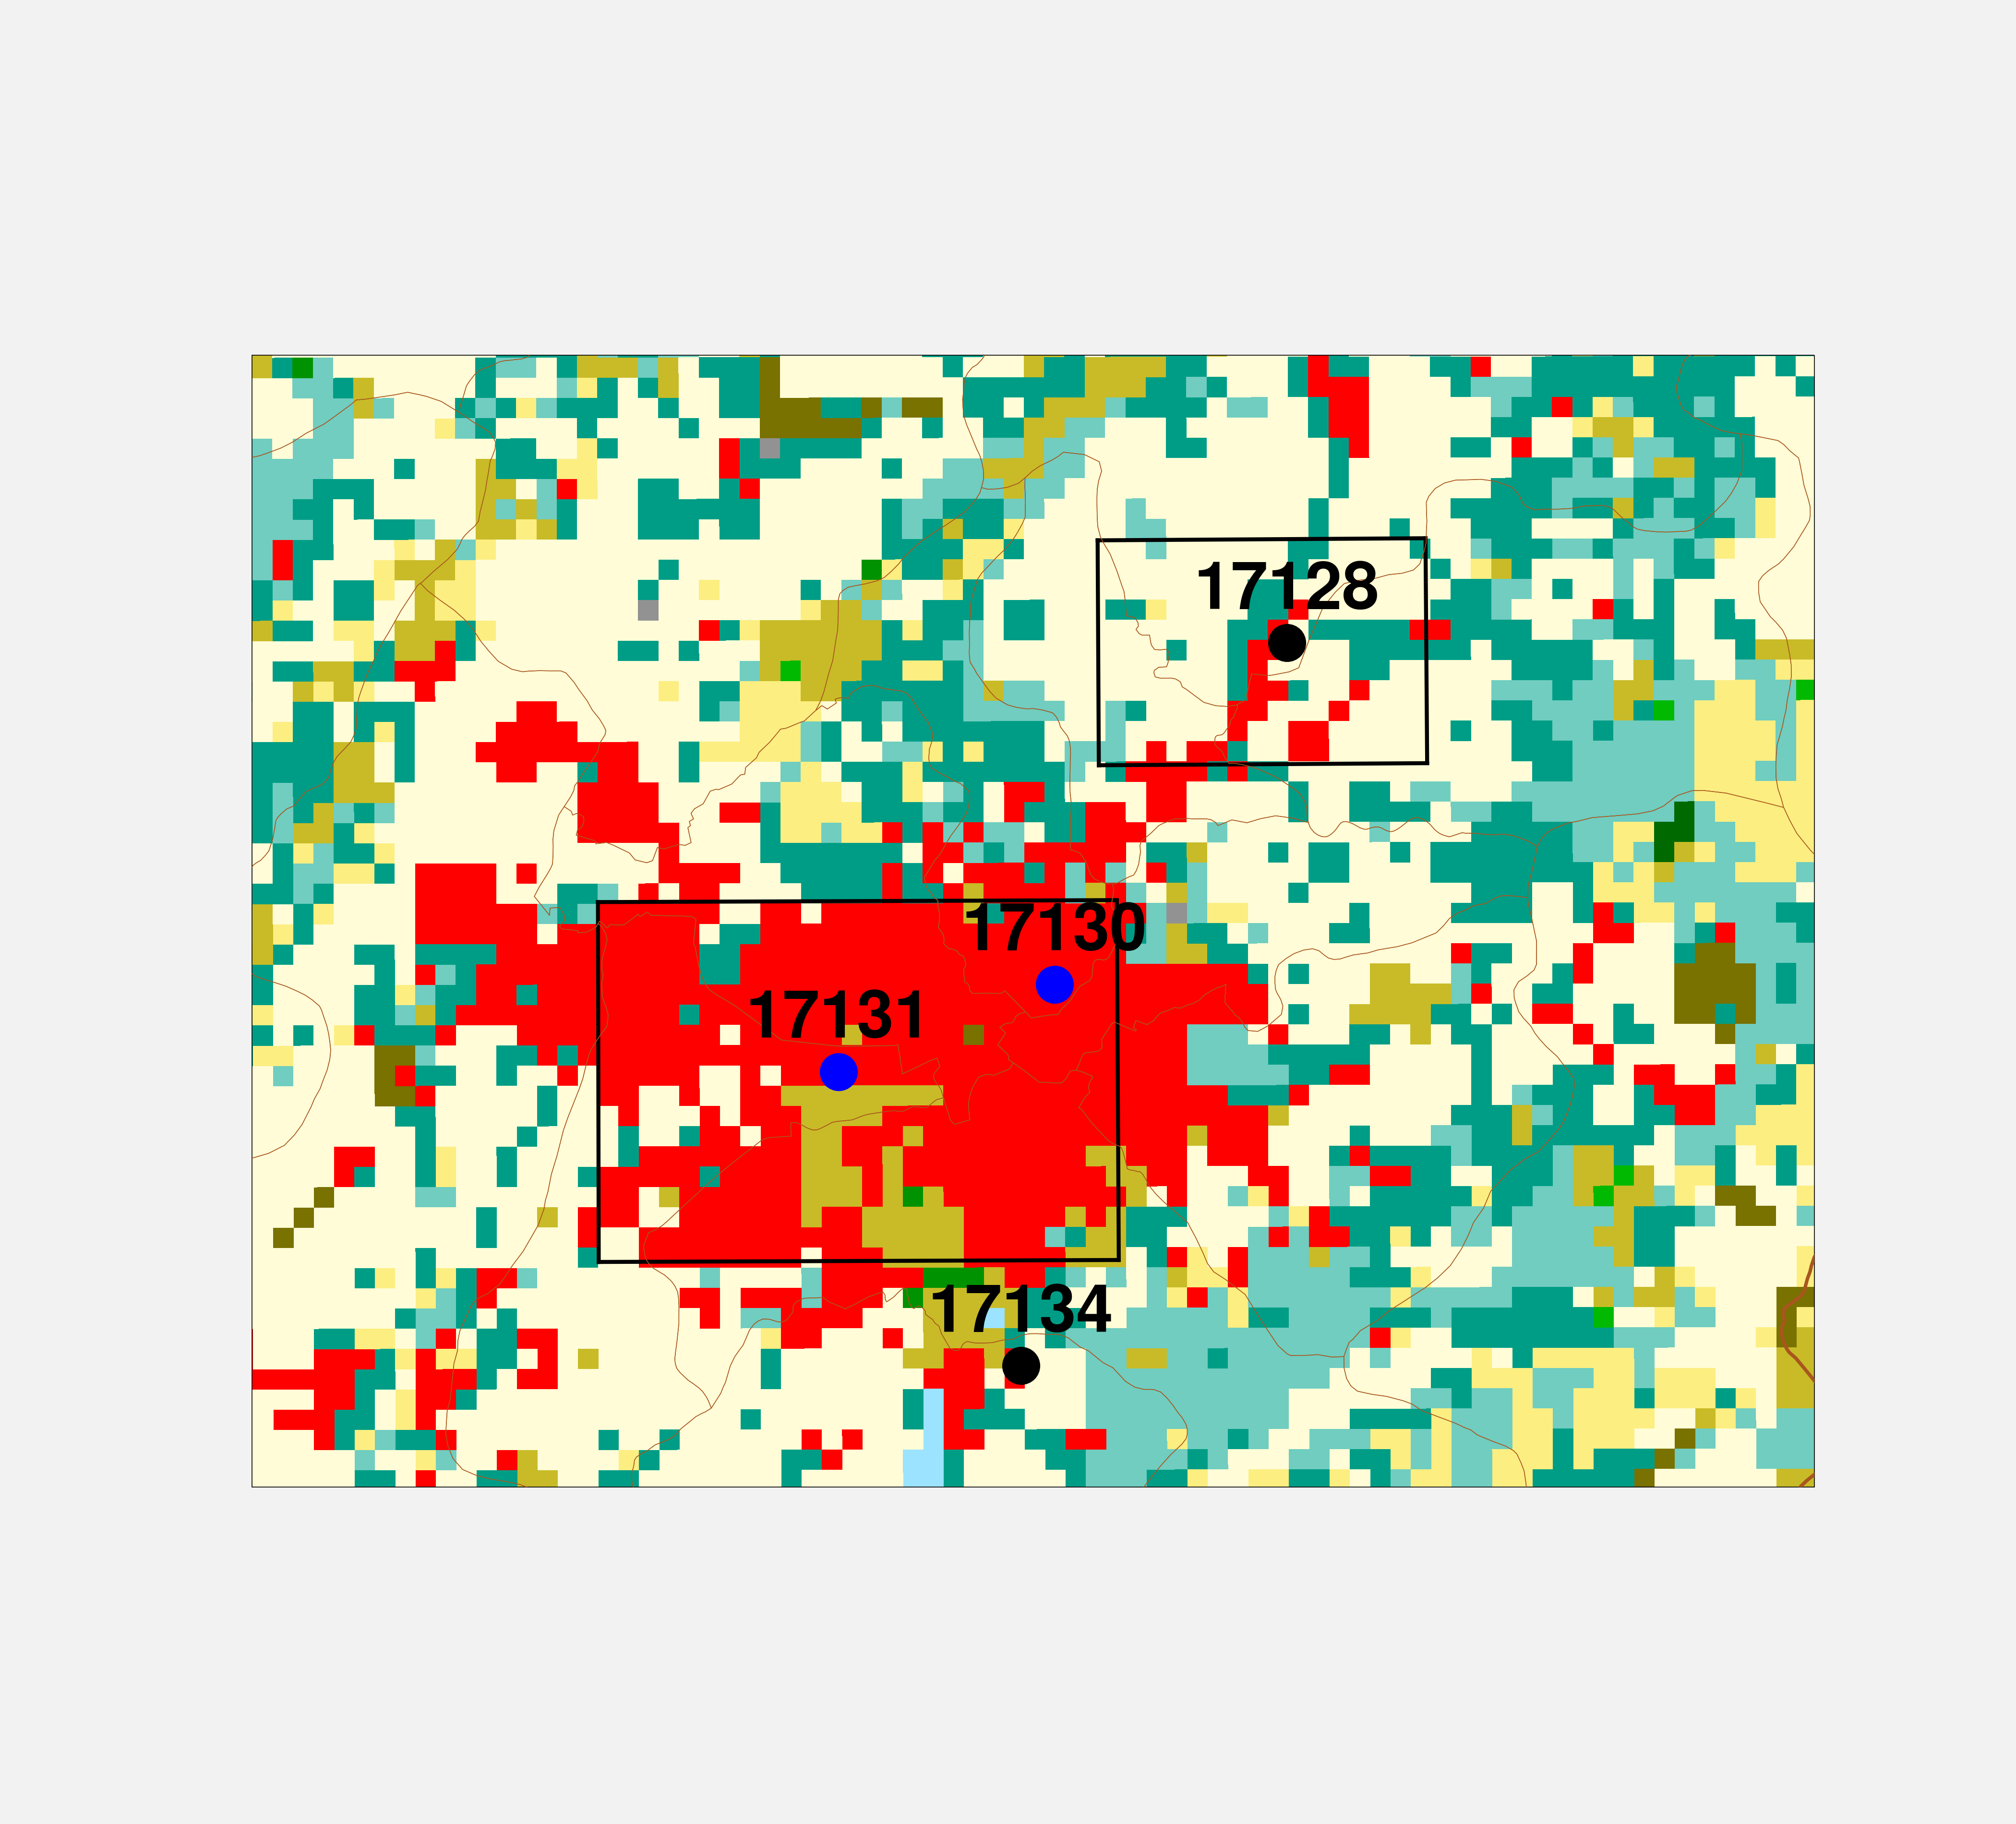

In [11]:
# Create a figure
# -------------------------------------------------------
#projeksiyon (wrf'tan sağlanan)
cart_proj = cartopy.crs.LambertConformal( 32.406708, 39.744022)

# -------------------------------------------------------
#figüre yaratalım
fig = plt.figure(figsize=(21,19))
ax = plt.axes(projection=cart_proj)

# -------------------------------------------------------
# haritada hangi lat ve lon aralığını görselleştirelim?
ax.set_extent([32.4, 33.3, 39.75, 40.25])
       
# -------------------------------------------------------
# cartopy kullanarak shapefileleri okuyalım
shp_file_il = cartopy.io.shapereader.Reader(shape_path)
shp_file_ilce = cartopy.io.shapereader.Reader(shape_path2)
    
# -------------------------------------------------------
# il sınırları
shape_feature_il = ShapelyFeature(shp_file_il.geometries(),
                                  cartopy.crs.PlateCarree(), edgecolor='none', linewidths=0.9,
                                  facecolor='#f0e7d8', zorder=1.5)
shape_feature_il_copy = ShapelyFeature(shp_file_il.geometries(),
                                       cartopy.crs.PlateCarree(), edgecolor='sienna', linewidths=2.5,
                                       facecolor='none', zorder=3)

# -------------------------------------------------------
#ilçe sınırları
shape_feature_ilce = ShapelyFeature(shp_file_ilce.geometries(),
                                    cartopy.crs.PlateCarree(), edgecolor='sienna', linewidths=0.5,
                                    facecolor='none', zorder=3)

# -------------------------------------------------------
# shapefileları feature olarak axisimize ekleyelim    
ax.add_feature(shape_feature_il) 
ax.add_feature(shape_feature_il_copy)
ax.add_feature(shape_feature_ilce)

# -------------------------------------------------------
# lu_indexi çizelim harita üzerine    
interval = np.arange(0, 22, 1)
mesh = plt.pcolormesh(lons.values[0], lats.values[0], lu_index.values[0]-0.5, norm=norm, cmap=cmap, 
                      transform=cartopy.crs.PlateCarree(), zorder=2)

# -------------------------------------------------------

# urban extent
plt.plot([urban_sol_alt_coordinates[0], urban_sol_ust_coordinates[0]], 
         [urban_sol_alt_coordinates[1], urban_sol_ust_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

plt.plot([urban_sol_ust_coordinates[0], urban_sag_ust_coordinates[0]], 
         [urban_sol_ust_coordinates[1], urban_sag_ust_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

plt.plot([urban_sag_ust_coordinates[0], urban_sag_alt_coordinates[0]], 
         [urban_sag_ust_coordinates[1], urban_sag_alt_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

plt.plot([urban_sol_alt_coordinates[0], urban_sag_alt_coordinates[0]], 
         [urban_sol_alt_coordinates[1], urban_sag_alt_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

# nourban extent
plt.plot([rural_sol_alt_coordinates[0], rural_sol_ust_coordinates[0]], 
         [rural_sol_alt_coordinates[1], rural_sol_ust_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

plt.plot([rural_sol_ust_coordinates[0], rural_sag_ust_coordinates[0]], 
         [rural_sol_ust_coordinates[1], rural_sag_ust_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

plt.plot([rural_sag_ust_coordinates[0], rural_sag_alt_coordinates[0]], 
         [rural_sag_ust_coordinates[1], rural_sag_alt_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

plt.plot([rural_sol_alt_coordinates[0], rural_sag_alt_coordinates[0]], 
         [rural_sol_alt_coordinates[1], rural_sag_alt_coordinates[1]], 
         transform=cartopy.crs.PlateCarree(), color='black', linewidth=3.0)

for i,j in zip(station_detail_temp, range(len(station_detail_temp))):
    if i == '17128' or i=='17134':
        ax.text(station_detail_temp[i][2], station_detail_temp[i][1]+0.015, i, color='k',  zorder=5, ha='center',weight='bold', fontsize=50 , transform = cartopy.crs.PlateCarree())
        ax.plot(station_detail_temp[i][2], station_detail_temp[i][1], marker='.', markersize=55, color='black',  zorder=5, transform = cartopy.crs.PlateCarree())
    else:
        ax.text(station_detail_temp[i][2], station_detail_temp[i][1]+0.015, i, color='k',  zorder=5, ha='center',weight='bold', fontsize=50 , transform = cartopy.crs.PlateCarree())
        ax.plot(station_detail_temp[i][2], station_detail_temp[i][1], marker='.', markersize=55, color='blue',  zorder=5, transform = cartopy.crs.PlateCarree())
    

# -------------------------------------------------------
# save figure
plt.savefig(r'pictures\FigureS11.jpeg',
            bbox_inches='tight', optimize=True, progressive=True, dpi=500)
#plt.savefig(r'pictures\MODIS_AWS_BOX_LOCS_v2.eps',
 #           bbox_inches='tight', optimize=True, progressive=True, dpi=1200)